In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('telecom_customer_churn.csv')

## Data Understanding

In [3]:
class DatasetDisplay:
    def __init__(self, df):
        self.df = df
    
    def display_info(self):
        print(f'First Five Rows of DataFrame:\n{self.df.head()}')
        print('------------------------------------------')
        print(f'DataFrame Information:\n{self.df.info()}')
        print('------------------------------------------')
        print(f'Descriptive Statistics of DataFrame:\n{self.df.describe()}')
        print('------------------------------------------')
        print(f'Shape of DataFrame: {self.df.shape}')



In [4]:
display = DatasetDisplay(df)
display.display_info()

First Five Rows of DataFrame:
  Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   Zip Code   Latitude   Longitude  Number of Referrals  ...   Payment Method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   
3     94553  38.014457 -122.115432                    1  ...  Bank Withdrawal   
4     93010  34.227846 -119.079903                    3  ...      Credit Card   

  Monthly Charge Total Charges  Total 

## Check Datatypes

In [5]:
def show_datatypes(data):
    dtype_df = pd.DataFrame(data.dtypes, columns=['DataType'])
    dtype_df.reset_index(inplace=True)
    dtype_df.columns = ['Column', 'DataType']
    return dtype_df

In [6]:
show_datatypes(df)

,Column,DataType
0,Customer ID,object
1,Gender,object
2,Age,int64
3,Married,object
4,Number of Dependents,int64
5,City,object
6,Zip Code,int64
7,Latitude,float64
8,Longitude,float64
9,Number of Referrals,int64


In [7]:
def display_data_types_summary(data):
    dtype_summary = data.dtypes.value_counts().reset_index()
    dtype_summary.columns = ['Data Type', 'Total Variables']
    return dtype_summary


In [8]:
display_data_types_summary(df)

,Data Type,Total Variables
0,object,23
1,float64,9
2,int64,6


## Missing Values

In [9]:
def missing(data):
    missing= data.isnull().sum()
    percentage= missing/len(data)
    return pd.DataFrame({'Number Of Missing Values': missing, 'Percentage of Missing Values': percentage})

In [10]:
missing(df)

,Number Of Missing Values,Percentage of Missing Values
Customer ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Married,0,0.000000
Number of Dependents,0,0.000000
City,0,0.000000
Zip Code,0,0.000000
Latitude,0,0.000000
Longitude,0,0.000000
Number of Referrals,0,0.000000


### Drop Columns

In [11]:
class DropColumn:
    def __init__(self, data):
        self.data = data

    def drop_columns(self, columns):
        self.data.drop(columns=columns, inplace=True)

In [12]:
data = df
dropper = DropColumn(data)
columns_to_drop = ['Churn Category', 'Churn Reason', 'Customer ID']  # List of column names to drop
dropper.drop_columns(columns_to_drop)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   City                               7043 non-null   object 
 5   Zip Code                           7043 non-null   int64  
 6   Latitude                           7043 non-null   float64
 7   Longitude                          7043 non-null   float64
 8   Number of Referrals                7043 non-null   int64  
 9   Tenure in Months                   7043 non-null   int64  
 10  Offer                              7043 non-null   object 
 11  Phone Service                      7043 non-null   objec

## Fill missing Values

In [14]:
def fill_missing_values(data):
    data.fillna(method='ffill', axis=0, inplace=True)
    filled_values_count = data.isnull().sum().sum()
    
    if filled_values_count == 0:
        print("All missing values have been successfully filled.")
    else:
        print(f"There are still {filled_values_count} missing values remaining.")

In [15]:
fill_missing_values(df)

All missing values have been successfully filled.


## Duplicates

In [16]:
def duplicates(data):
    duplicates= data.duplicated().any()
    if duplicates:
        print('Duplicates Present')
    else:
        print('There are no duplicates in the DataFrame')

In [17]:
duplicates(df)

There are no duplicates in the DataFrame


## Unique Values

In [18]:
def unique_values(data):
    categorical_columns = data.select_dtypes(include='object').columns
    for column in categorical_columns:
        unique_values = data[column].unique()
        print(f"There are Unique Values in '{column}': {unique_values}")

In [19]:
unique_values(df)

There are Unique Values in 'Gender': ['Female' 'Male']
There are Unique Values in 'Married': ['Yes' 'No']
There are Unique Values in 'City': ['Frazier Park' 'Glendale' 'Costa Mesa' ... 'Jacumba' 'Carpinteria'
 'Meadow Valley']
There are Unique Values in 'Offer': ['None' 'Offer E' 'Offer D' 'Offer A' 'Offer B' 'Offer C']
There are Unique Values in 'Phone Service': ['Yes' 'No']
There are Unique Values in 'Multiple Lines': ['No' 'Yes']
There are Unique Values in 'Internet Service': ['Yes' 'No']
There are Unique Values in 'Internet Type': ['Cable' 'Fiber Optic' 'DSL']
There are Unique Values in 'Online Security': ['No' 'Yes']
There are Unique Values in 'Online Backup': ['Yes' 'No']
There are Unique Values in 'Device Protection Plan': ['No' 'Yes']
There are Unique Values in 'Premium Tech Support': ['Yes' 'No']
There are Unique Values in 'Streaming TV': ['Yes' 'No']
There are Unique Values in 'Streaming Movies': ['No' 'Yes']
There are Unique Values in 'Streaming Music': ['No' 'Yes']
There ar

## Outliers

In [20]:
def outliers(data):
    numerical_columns= data.select_dtypes(include=['int64', 'float64']).columns

    outliers= {}

    for column in numerical_columns:
        # Calculate IQR threshold for outliers
        q1= data[column].quantile(0.25)
        q3= data[column].quantile(0.75)
        iqr= q3-q1
        threshold= 1.5*iqr

        # Identify outliers
        column_outliers = data[(data[column] < q1 - threshold) | (data[column] > q3 + threshold)]
        outliers[column] = column_outliers

    # Concatenate outliers into a single dataframe
    outliers_df = pd.concat(outliers.values(), keys=outliers.keys())
    return outliers

In [21]:
outliers(df)


{'Age': Empty DataFrame
 Columns: [Gender, Age, Married, Number of Dependents, City, Zip Code, Latitude, Longitude, Number of Referrals, Tenure in Months, Offer, Phone Service, Avg Monthly Long Distance Charges, Multiple Lines, Internet Service, Internet Type, Avg Monthly GB Download, Online Security, Online Backup, Device Protection Plan, Premium Tech Support, Streaming TV, Streaming Movies, Streaming Music, Unlimited Data, Contract, Paperless Billing, Payment Method, Monthly Charge, Total Charges, Total Refunds, Total Extra Data Charges, Total Long Distance Charges, Total Revenue, Customer Status]
 Index: []
 
 [0 rows x 35 columns],
 'Number of Dependents':       Gender  Age Married  Number of Dependents                 City  \
 5     Female   23      No                     3             Midpines   
 9     Female   43     Yes                     1             Sheridan   
 11    Female   25     Yes                     2            Sunnyvale   
 15    Female   58     Yes              

In [22]:
df.isna().sum()

Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                 

## Exploratory Data Analysis

In [23]:
df['Customer Status'].value_counts()

Stayed     4720
Churned    1869
Joined      454
Name: Customer Status, dtype: int64

In [24]:
df.drop(df[df['Customer Status'] == 'Joined'].index, inplace=True)

In [25]:
df['Customer Status'].value_counts()

Stayed     4720
Churned    1869
Name: Customer Status, dtype: int64

In [26]:
def create_numeric_column(df, column_name, new_column_name, mapping_dict):
    """
    Create a new column with numeric representation based on the content of another column.
    
    Args:
        df (DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to transform.
        new_column_name (str): The name of the new column to be created.
        mapping_dict (dict): A dictionary mapping content values to their numeric representations.
        
    Returns:
        DataFrame: The updated DataFrame with the new column added.
    """
    
    # Create the new column by mapping the values from 'column_name' using the dictionary
    df[new_column_name] = df[column_name].map(mapping_dict)
    
    return df


In [27]:
mapping_dict = {'Stayed': 0, 'Churned': 1}
df= create_numeric_column(df, 'Customer Status', 'Category', mapping_dict)
df.head()

,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,...,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Category
0,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,...,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,0
1,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,...,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,0
2,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,...,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,1
3,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,...,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,1
4,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,...,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,1


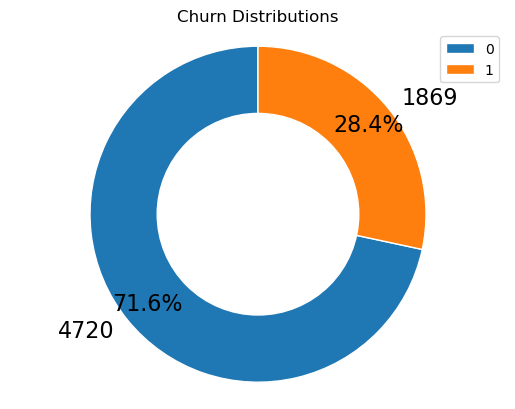

In [31]:
# Get the counts of each category from the 'customerstatus' column
category_counts = df['Category'].value_counts()

# Create a pie chart with the category counts
plt.pie(
    category_counts,
    labels=category_counts,
    autopct='%1.1f%%',  # Display percentage values with one decimal place
    startangle=90,  # Start the first slice at 90 degrees (top of the circle)
    wedgeprops={'edgecolor': 'white'},  # Add white edge color to the chart slices
    pctdistance=0.85,  # Adjust the distance of percentage labels from the center
    textprops={'fontsize': 16}  # Set the font size of the labels
)
# Create a white circle in the center to make it a donut-like pie chart
circle = plt.Circle((0, 0), 0.6, color='white')
fig = plt.gcf()
fig.gca().add_artist(circle)
# Set the title of the chart
plt.title("Churn Distributions") 
# Add a legend with the labels
plt.legend(labels=category_counts.index, loc='best')
# Ensure the pie chart is drawn as a circle
plt.axis('equal')  
# Display the chart
plt.show()  
